<a href="https://colab.research.google.com/github/sobiya1234/Machine-Learning/blob/main/ML_Assignment_1_Statistical_Measures_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Descriptive Statistics:

In [ ]:
URL='https://raw.githubusercontent.com/sobiya1234/student-performance/refs/heads/main/StudentsPerformance.csv'
df=pd.read_csv(URL)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


COMPUTING THE SCORE COLUMNS....

In [ ]:
score_columns = ['math score', 'reading score', 'writing score']

In [ ]:
summary = {
    "Mean": df[score_columns].mean(),
    "Median": df[score_columns].median(),
    "Mode": df[score_columns].mode().iloc[0],
    "Minimum": df[score_columns].min(),
    "Maximum": df[score_columns].max(),
    "Standard Deviation": df[score_columns].std()
}
summary_df = pd.DataFrame(summary)
print(summary_df.T)

                    math score  reading score  writing score
Mean                  66.08900      69.169000      68.054000
Median                66.00000      70.000000      69.000000
Mode                  65.00000      72.000000      74.000000
Minimum                0.00000      17.000000      10.000000
Maximum              100.00000     100.000000     100.000000
Standard Deviation    15.16308      14.600192      15.195657


2. Identify and Handle Outliers:

2.1. Use boxplots to visually identify outliers in the math score, reading score, and writing score columns.

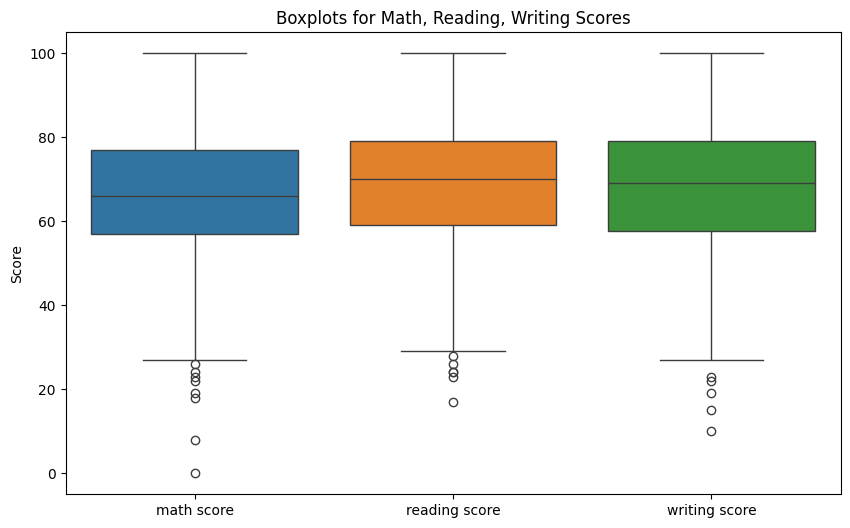

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[score_columns])
plt.title('Boxplots for Math, Reading, Writing Scores')
plt.ylabel('Score')
plt.show()

2.2. Calculate the Interquartile Range (IQR) for each of these score columns.

In [ ]:
Q1=df[score_columns].quantile(0.25)
Q3=df[score_columns].quantile(0.75)
IQR=Q3-Q1
print(IQR)

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


2.3. Determine the lower and upper bounds for outliers using the IQR method

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:")
print(lower_bound)
print("\nUpper Bound:")
print(upper_bound)

Lower Bound:
math score       27.000
reading score    29.000
writing score    25.875
dtype: float64

Upper Bound:
math score       107.000
reading score    109.000
writing score    110.875
dtype: float64


2.4. Handle the outliers by removing them from the dataset.

In [ ]:
mask = (df[score_columns] >= lower_bound) & (df[score_columns] <= upper_bound)
df_no_outliers = df[mask.all(axis=1)]
df_no_outliers = df[mask]
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

Original dataset size: 1000
Dataset size after removing outliers: 1000


3. Check Distribution and Skewness:

3.1. Plot histograms and/or density plots for math score, reading score, and writing score to visualize their distributions.

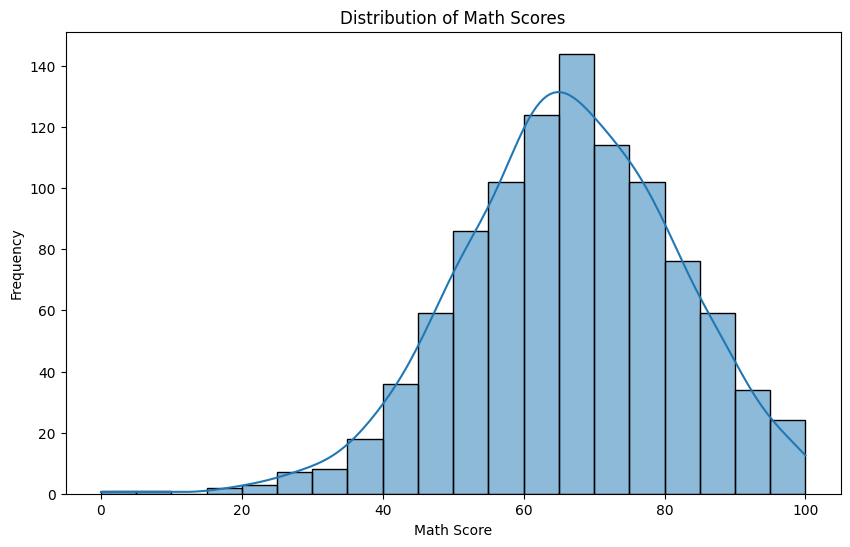

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

3.2. Calculate and interpret the skewness for each of these score columns.

In [ ]:
#Math score has a slight positive skew.
#Reading score and writing score have mild negative skew.
skewness = df[score_columns].skew()
print(skewness)

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64


3.3. Discuss whether the distributions are skewed to the left or right and suggest any appropriate transformations if needed to address skewness.

In [ ]:
df['log_math_score'] = np.log1p(df['math score'])
df['log_reading_score'] = np.log1p(df['reading score'])
df['log_writing_score'] = np.log1p(df['writing score'])

4.1. Formulate Hypotheses:

In [ ]:
from scipy import stats

In [ ]:
completed_mean = df[df['test preparation course'] == 'completed']['math score']
not_completed = df[df['test preparation course'] == 'none']['math score']
t_test,p_value=stats.ttest_ind(completed_mean,not_completed)
print(f"t-statistic: {t_test}")
print(f"p-value: {p_value}")

t-statistic: 5.704616417349102
p-value: 1.5359134607147415e-08


4.2. Significance Level:

In [ ]:
CI=0.95
alpha = 1-CI
alpha

0.050000000000000044

In [ ]:
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: The mean math scores differ between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean math scores.")

Reject the null hypothesis: The mean math scores differ between the two groups.


4.3. t-test Test Statistic & p-value:

Perform a t-test to compare the means of the two groups.

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'log_math_score', 'log_reading_score',
       'log_writing_score'],
      dtype='object')

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
male_scores = df[df['gender'] == 'male']['math score'].mean()
female_scores = df[df['gender'] == 'female']['math score'].mean()
t_statistic, p_value = ttest_ind(male_scores, female_scores)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: nan
P-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:6195: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Calculate the test statistic and p-value.

In [ ]:
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in math scores between males and females.")
else:
    print("Fail to reject the null hypothesis: No significant difference in math scores between males and females.")


Fail to reject the null hypothesis: No significant difference in math scores between males and females.


Provide the results and interpret them in the context of the hypothesis.

In [ ]:
t_stat, p_val = ttest_ind(male_scores, female_scores, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: nan
P-value: nan


4.4. Decision:

Based on the p-value or the t-statistic, decide whether to reject or fail to reject the null hypothesis.

In [ ]:
if p_val < alpha:
    decision = "Reject the null hypothesis: There is a significant difference in math scores between males and females."
else:
    decision = "Fail to reject the null hypothesis: No significant difference in math scores between males and females."
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Decision: {decision}")

T-statistic: nan
P-value: nan
Decision: Fail to reject the null hypothesis: No significant difference in math scores between males and females.


Discuss the implications of your decision in relation to the context of the problem.

In [ ]:
# Implications based on the decision
if p_val < alpha:
    implications = """
    The decision to reject the null hypothesis suggests that gender plays a role in the math performance of students.
    This could lead to further investigation into the underlying reasons for this difference, such as educational methods,
    access to resources, or societal factors that might influence performance. Addressing this gap could help in formulating
    targeted interventions to improve math outcomes across both genders.
    """
else:
    implications = """
    Failing to reject the null hypothesis suggests that there is no significant gender-based difference in math scores.
    This result may indicate that, at least for this sample of students, both male and female students perform similarly
    in math. However, this could also mean that other factors, such as study habits, test preparation, or socioeconomic
    background, might be more influential on math performance than gender alone.
    """

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Decision: {decision}")
print(f"Implications: {implications}")

T-statistic: nan
P-value: nan
Decision: Fail to reject the null hypothesis: No significant difference in math scores between males and females.
Implications: 
    Failing to reject the null hypothesis suggests that there is no significant gender-based difference in math scores.
    This result may indicate that, at least for this sample of students, both male and female students perform similarly
    in math. However, this could also mean that other factors, such as study habits, test preparation, or socioeconomic
    background, might be more influential on math performance than gender alone.
    
